# The Battle of Neighborhoods - Osaka

We first import all of the packages we will need throughout the code.

In [13]:
import pandas as pd
import numpy as np
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

# 1. Introduction

Osaka is well-known as the kitchen of Japan, which says a lot, given the internationally highly praised food culture of Japan. Moreover, with its increasing popularity as a tourist destination, it may be of interest to have an overview of the city’s neighborhoods for hungry tourists looking for a good spot to replenish their energy throughout the day, or enjoy a nice dinner after an active day of exploring.

Thus, we formulate our business problem as follows: can we provide a segmentation of Osaka’s neighborhoods in terms of restaurants that is useful for tourists visiting the city, given the difficulty of choice due to the large number of possibilities to choose from?

In an attempt to solve this problem, we will leverage Foursquare location data on restaurants in Osaka, while referring to the different neighborhoods of the city so as to provide useful information regardless of which part of the city a hungry tourist may find themselves in.

# 2. Data

We shall require the following data in order to solve the above problem:
    
- Neighborhoods & coordinates: Similarly to previous labs, we will scrape the Wikipedia page on the list of Osaka’s wards, after which we will obtain the coordinates of the wards using the geocoder class of the Geopy client. This data consists of features such as the name of the ward, its population, its area, and most importantly its coordinates.

- Restaurants: we will source the data on restaurants in Osaka’s neighborhoods from Foursquare API. This data might consist of features such as venue category, type of restaurant.


# 3. Methodology

## 3.1 Data Collection

### 3.1.1 Wikipedia Data

First we scrape the Wikipedia page for Osaka's wards.

In [5]:
url_osaka = "https://en.wikipedia.org/wiki/Osaka#List_of_wards"
wiki_url_osaka = requests.get(url_osaka)
wiki_url_osaka

<Response [200]>

Response 200 indicates that the connection to the web page was successful.

In [7]:
wiki_data_osaka = pd.read_html(wiki_url_osaka.text)
wiki_data_osaka

[   Osaka  .mw-parser-output .nobold{font-weight:normal}大阪市  \
 0                                     Designated city        
 1                                          Osaka City        
 2   Night view from Umeda Sky BuildingDōtonbori an...        
 3                                            FlagSeal        
 4                                                 NaN        
 5               Location of Osaka in Osaka Prefecture        
 6   .mw-parser-output .locmap .od{position:absolut...        
 7   Coordinates: .mw-parser-output .geo-default,.m...        
 8                                             Country        
 9                                              Region        
 10                                         Prefecture        
 11                                         Government        
 12                                            • Mayor        
 13                                               Area        
 14                                            • Total 

As the data is not properly parsed, we save the data contained under the Wikipedia link as a CSV file, and read the data from there.

In [12]:
wiki_data_osaka = pd.read_csv("Osaka_Wards_Wiki.csv")
wiki_data_osaka

,No.,Name,Kanji,Population,Land area in km2,Pop. Density per km2
0,1,Abeno-ku,阿倍野区,"107,000",5.99,"18,440"
1,2,Asahi-ku,旭区,"90,854",6.32,"14,376"
2,3,Chūō-ku,中央区,"100,998",8.87,"11,386"
3,4,Fukushima-ku,福島区,"78,348",4.67,"16,777"
4,5,Higashinari-ku,東成区,"83,684",4.54,"18,433"
5,6,Higashisumiyoshi-ku,東住吉区,"126,704",9.75,"12,995"
6,7,Higashiyodogawa-ku,東淀川区,"176,943",13.27,"13,334"
7,8,Hirano-ku,平野区,"193,282",15.28,"12,649"
8,9,Ikuno-ku,生野区,"129,641",8.37,"15,489"
9,10,Jōtō-ku,城東区,"167,925",8.38,"20,039"


### 3.1.2 Geopy Client Data (Coordinates)

We now need to obtain the coordinates of each of the wards, which we do by means of the geocoder class of Geopy client.

In [62]:
geolocator = Nominatim(user_agent="Osaka_explorer")

wiki_data_osaka['Ward Coord'] = wiki_data_osaka['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
wiki_data_osaka[['Latitude', 'Longitude']] = wiki_data_osaka['Ward Coord'].apply(pd.Series)

wiki_data_osaka.drop(['Ward Coord'], axis=1, inplace=True)

# rename the column "Name" to "Ward"
wiki_data_osaka.rename(columns = {'Name':'Ward'}, inplace = True) 

wiki_data_osaka

,No.,Ward,Kanji,Population,Land area in km2,Pop. Density per km2,Latitude,Longitude
0,1,Abeno-ku,阿倍野区,"107,000",5.99,"18,440",34.627501,135.514095
1,2,Asahi-ku,旭区,"90,854",6.32,"14,376",34.726483,135.546952
2,3,Chūō-ku,中央区,"100,998",8.87,"11,386",35.666255,139.775565
3,4,Fukushima-ku,福島区,"78,348",4.67,"16,777",34.692104,135.474812
4,5,Higashinari-ku,東成区,"83,684",4.54,"18,433",34.672912,135.550567
5,6,Higashisumiyoshi-ku,東住吉区,"126,704",9.75,"12,995",34.615662,135.531096
6,7,Higashiyodogawa-ku,東淀川区,"176,943",13.27,"13,334",34.740212,135.517432
7,8,Hirano-ku,平野区,"193,282",15.28,"12,649",34.603715,135.559027
8,9,Ikuno-ku,生野区,"129,641",8.37,"15,489",34.653003,135.547722
9,10,Jōtō-ku,城東区,"167,925",8.38,"20,039",34.693887,135.547769


Now let us get the coordinates of Osaka.

In [19]:
address = 'Osaka, Japan'
geolocator = Nominatim(user_agent = "osaka_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The coordinates of Osaka are {}, {}.".format(latitude, longitude))

The coordinates of Osaka are 34.6198813, 135.490357.


With this, let us produce a plot of Osaka with markers on each of the wards.

In [20]:
map_Osaka = folium.Map(location = [latitude, longitude], zoom_start=11)

# add markers to the map
for latitude, longitude, ward in zip(wiki_data_osaka['Latitude'], wiki_data_osaka['Longitude'], wiki_data_osaka['Ward']):
    label = '{}'.format(ward)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([latitude, longitude], radius = 5, popup = label, color = 'blue', fill = True).add_to(map_Osaka)

map_Osaka

### 3.1.3 Foursquare Location Data

First we initialize the Foursquare API credentials.

In [21]:
CLIENT_ID = 'ZEQ5QTC1Y0YYNXSPPCX4NNYCXXL1U54PS5F0VN33EG2WMCHC'
CLIENT_SECRET = 'X2KCHJNEATOV4KZV44AKVPUHXZ1SCCYQ3KQXU25BGXEQHUPF'
VERSION = '20180605'

The next step is to create a function for obtaining the nearby (e.g. within a distance of 500 meters) venue categories in Osaka.

In [22]:
def get_nearby_venues(names, latitudes, longitudes, radius = 500):
    list_of_venues = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the URL for the API request
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius
        )
        # the get-request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only the relevant information for every nearby venue
        list_of_venues.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for list_of_venues in list_of_venues for item in list_of_venues])
    nearby_venues.columns = ['Neighborhood',
                            'Neighborhood Latitude',
                            'Neighborhood Longitude',
                            'Venue',
                            'Venue Category']
    return(nearby_venues)

Using the function "get_nearby_venues", we collect the venues for each neighborhood in Osaka.

In [23]:
osaka_venues = get_nearby_venues(wiki_data_osaka['Ward'], wiki_data_osaka['Latitude'], wiki_data_osaka['Longitude'])

Abeno-ku
Asahi-ku
Chūō-ku
Fukushima-ku
Higashinari-ku
Higashisumiyoshi-ku
Higashiyodogawa-ku
Hirano-ku
Ikuno-ku
Jōtō-ku
Kita-ku (administrative center)
Konohana-ku
Minato-ku
Miyakojima-ku
Naniwa-ku
Nishi-ku
Nishinari-ku
Nishiyodogawa-ku
Suminoe-ku
Sumiyoshi-ku
Taishō-ku
Tennōji-ku
Tsurumi-ku
Yodogawa-ku


## 3.2. Exploratory Data Analysis

Let's first check the shape of the resulting data.

In [24]:
osaka_venues.shape

(445, 5)

We see that there are 445 venues, with the 5 columns as specified in the function "get_nearby_venues". Now let us have a look at the first 5 rows.

In [25]:
osaka_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Abeno-ku,34.627501,135.514095,Usagi to Boku (うさぎとぼく),Coffee Shop
1,Abeno-ku,34.627501,135.514095,ライフ セントラルスクエア 北畠店,Supermarket
2,Abeno-ku,34.627501,135.514095,7-Eleven (セブンイレブン 大阪阪南町3丁目店),Convenience Store
3,Abeno-ku,34.627501,135.514095,FamilyMart (ファミリーマート 阿倍野昭和町店),Convenience Store
4,Abeno-ku,34.627501,135.514095,モスバーガー 昭和町店,Fast Food Restaurant


We see that there are more than just restaurants included in our Venue Category column, so we filter for restaurants only.

In [34]:
osaka_restaurants = osaka_venues[osaka_venues['Venue Category'].str.contains("Restaurant|restaurant")]
osaka_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
4,Abeno-ku,34.627501,135.514095,モスバーガー 昭和町店,Fast Food Restaurant
13,Abeno-ku,34.627501,135.514095,Sea茶,Indian Restaurant
17,Asahi-ku,34.726483,135.546952,MOS Burger (モスバーガー),Fast Food Restaurant
28,Asahi-ku,34.726483,135.546952,なか卯 千林大宮店,Donburi Restaurant
33,Asahi-ku,34.726483,135.546952,中国料理 風来坊,Chinese Restaurant
...,...,...,...,...,...
423,Tennōji-ku,34.655043,135.518370,ENTERTAIN麺T style JUNK STORY M.I Label,Ramen Restaurant
424,Tennōji-ku,34.655043,135.518370,其蘭,Chinese Restaurant
425,Tennōji-ku,34.655043,135.518370,四天王寺すし割鮮 天山,Sushi Restaurant
433,Yodogawa-ku,34.726613,135.483397,来来亭 十三店,Ramen Restaurant


We see that we have kept 131 different restaurants.

Next, let us look at the restaurants per ward.

In [35]:
osaka_restaurants.groupby('Neighborhood').head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
4,Abeno-ku,34.627501,135.514095,モスバーガー 昭和町店,Fast Food Restaurant
13,Abeno-ku,34.627501,135.514095,Sea茶,Indian Restaurant
17,Asahi-ku,34.726483,135.546952,MOS Burger (モスバーガー),Fast Food Restaurant
28,Asahi-ku,34.726483,135.546952,なか卯 千林大宮店,Donburi Restaurant
33,Asahi-ku,34.726483,135.546952,中国料理 風来坊,Chinese Restaurant
...,...,...,...,...,...
420,Tennōji-ku,34.655043,135.518370,Royal Host (ロイヤルホスト 上本町店),Restaurant
423,Tennōji-ku,34.655043,135.518370,ENTERTAIN麺T style JUNK STORY M.I Label,Ramen Restaurant
424,Tennōji-ku,34.655043,135.518370,其蘭,Chinese Restaurant
433,Yodogawa-ku,34.726613,135.483397,来来亭 十三店,Ramen Restaurant


We see that there are 85 entries when grouping by neighborhood (ward).

Now let us see which are the most frequent venue categories in our dataset.

<AxesSubplot:title={'center':'Top 10 most frequent restaurant categories in wards of Osaka'}, ylabel='Frequency'>

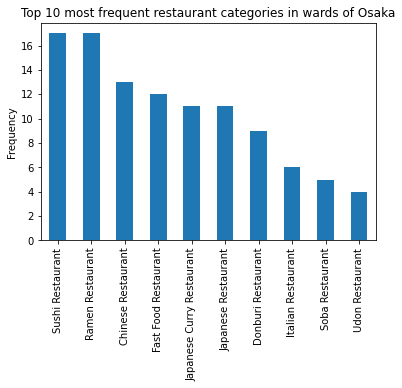

In [63]:
osaka_restaurants['Venue Category'].value_counts().head(10).plot(kind='bar',
                                                                 title='Top 10 most frequent restaurant categories in wards of Osaka',
                                                                 ylabel = 'Frequency'
                                                                )

We see that sushi and ramen restaurants lead the list!

Next, let us look at each neighborhood's (ward's) top 5 most common restaurant types. We do this by one-hot encoding the venue (restaurant) categories via the pandas get_dummies function.

In [43]:
osaka_restaurants_cat = pd.get_dummies(osaka_restaurants[['Venue Category']], prefix = "", prefix_sep = "")
osaka_restaurants_cat

,Chinese Restaurant,Donburi Restaurant,Fast Food Restaurant,French Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,...,Seafood Restaurant,Soba Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Teishoku Restaurant,Tempura Restaurant,Tonkatsu Restaurant,Udon Restaurant,Yakitori Restaurant,Yoshoku Restaurant
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we add the neighborhood to this one-hot encoded dataframe, and move it to the first column.

In [44]:
osaka_restaurants_cat['Neighborhood'] = osaka_restaurants['Neighborhood']

# move the 'Neighborhood' column to the first column
first_col = osaka_restaurants_cat.pop('Neighborhood')
osaka_restaurants_cat.insert(0, 'Neighborhood', first_col)

osaka_restaurants_cat.head()

,Neighborhood,Chinese Restaurant,Donburi Restaurant,Fast Food Restaurant,French Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,...,Seafood Restaurant,Soba Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Teishoku Restaurant,Tempura Restaurant,Tonkatsu Restaurant,Udon Restaurant,Yakitori Restaurant,Yoshoku Restaurant
4,Abeno-ku,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,Abeno-ku,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,Asahi-ku,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,Asahi-ku,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,Asahi-ku,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using pandas groupby on the Neighborhood column, we calculate the mean of the occurrence frequency of each venue (restaurant) category.

In [46]:
osaka_grouped = osaka_restaurants_cat.groupby('Neighborhood').mean().reset_index()
osaka_grouped

,Neighborhood,Chinese Restaurant,Donburi Restaurant,Fast Food Restaurant,French Restaurant,Halal Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,...,Seafood Restaurant,Soba Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Teishoku Restaurant,Tempura Restaurant,Tonkatsu Restaurant,Udon Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Abeno-ku,0.000000,0.000000,0.500000,0.0,0.00,0.5,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Asahi-ku,0.200000,0.200000,0.200000,0.0,0.00,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.200000,0.000000,0.000000
2,Chūō-ku,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.086957,0.000000,0.086957,...,0.043478,0.086957,0.000,0.565217,0.000,0.043478,0.000000,0.000000,0.043478,0.000000
3,Fukushima-ku,0.166667,0.083333,0.250000,0.0,0.00,0.0,0.083333,0.000000,0.083333,...,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.083333,0.000000,0.000000
4,Higashisumiyoshi-ku,0.250000,0.000000,0.250000,0.0,0.00,0.0,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000,0.250000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Higashiyodogawa-ku,0.222222,0.111111,0.111111,0.0,0.00,0.0,0.000000,0.111111,0.111111,...,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.111111,0.000000
6,Hirano-ku,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Ikuno-ku,0.250000,0.000000,0.000000,0.0,0.00,0.0,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000,0.000000,0.000,0.250000,0.000000,0.250000,0.000000,0.000000
8,Jōtō-ku,0.166667,0.000000,0.166667,0.0,0.00,0.0,0.000000,0.000000,0.166667,...,0.000000,0.166667,0.000,0.166667,0.000,0.000000,0.166667,0.000000,0.000000,0.000000
9,Kita-ku (administrative center),0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.125000,...,0.000000,0.000000,0.000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000


Finally, let us find each neighborhood's (ward's) top 5 most common venue (restaurant) categories.

In [48]:
num_of_top_venues = 5

for ward in osaka_grouped['Neighborhood']:
    print(ward)
    temp = osaka_grouped[osaka_grouped['Neighborhood'] == ward].T.reset_index()
    temp.columns = ['Category', 'Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_of_top_venues))
    print('\n')

Abeno-ku
               Category  Frequency
0  Fast Food Restaurant        0.5
1     Indian Restaurant        0.5
2    Chinese Restaurant        0.0
3            Restaurant        0.0
4   Yakitori Restaurant        0.0


Asahi-ku
               Category  Frequency
0    Chinese Restaurant        0.2
1  Fast Food Restaurant        0.2
2       Udon Restaurant        0.2
3    Donburi Restaurant        0.2
4      Ramen Restaurant        0.2


Chūō-ku
              Category  Frequency
0     Sushi Restaurant       0.57
1   Italian Restaurant       0.09
2  Japanese Restaurant       0.09
3      Soba Restaurant       0.09
4  Yakitori Restaurant       0.04


Fukushima-ku
               Category  Frequency
0  Fast Food Restaurant       0.25
1      Ramen Restaurant       0.25
2    Chinese Restaurant       0.17
3       Udon Restaurant       0.08
4    Italian Restaurant       0.08


Higashisumiyoshi-ku
                    Category  Frequency
0         Chinese Restaurant       0.25
1       Fast Food R

Now we define a function for getting the most common venue category.

In [52]:
def get_most_common_venues(row, num):
    """
    row: the row to be considered
    num: the number of venues to be returned
    """
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num]

As above, we go for the top 5 in order to cluster the neighborhoods.

In [53]:
num_of_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns based on the chosen number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_of_top_venues):
    try:
        columns.append('{}{} most common venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th most common venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = osaka_grouped['Neighborhood']

for ind in np.arange(osaka_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = get_most_common_venues(osaka_grouped.iloc[ind, :], num_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue
0,Abeno-ku,Fast Food Restaurant,Indian Restaurant,Yoshoku Restaurant,Kosher Restaurant,Donburi Restaurant
1,Asahi-ku,Chinese Restaurant,Udon Restaurant,Donburi Restaurant,Fast Food Restaurant,Ramen Restaurant
2,Chūō-ku,Sushi Restaurant,Soba Restaurant,Italian Restaurant,Japanese Restaurant,Kaiseki Restaurant
3,Fukushima-ku,Fast Food Restaurant,Ramen Restaurant,Chinese Restaurant,Udon Restaurant,Donburi Restaurant
4,Higashisumiyoshi-ku,Chinese Restaurant,Fast Food Restaurant,Sushi Restaurant,Japanese Curry Restaurant,Kosher Restaurant


## 3.3. Prescriptive Analytics

We use k-means clustering in order to segment Osaka's wards based on the venue (restaurant) categories. More precisely, wards with similar restaurant categories should be grouped together.

In [54]:
# choose a preliminary number of clusters
k = 5

osaka_grouped_cluster = osaka_grouped.drop('Neighborhood', 1)

# build k-means clustering model
k_means = KMeans(n_clusters = k, random_state=0).fit(osaka_grouped_cluster)

# check cluster labels generated for each row in the dataframe
k_means.labels_[0:]

array([4, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2])

We add the clustering label column to the top 5 most common venue categories.

In [55]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', k_means.labels_)

Now join the dataframes osaka_grouped and osaka_restaurants on the 'Neighborhood' column in order to add the latitudes and longitudes for each neighborhood, so as to be able to create a plot.

In [56]:
osaka_merged = osaka_restaurants
osaka_merged = osaka_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')
osaka_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Cluster Labels,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue
4,Abeno-ku,34.627501,135.514095,モスバーガー 昭和町店,Fast Food Restaurant,4,Fast Food Restaurant,Indian Restaurant,Yoshoku Restaurant,Kosher Restaurant,Donburi Restaurant
13,Abeno-ku,34.627501,135.514095,Sea茶,Indian Restaurant,4,Fast Food Restaurant,Indian Restaurant,Yoshoku Restaurant,Kosher Restaurant,Donburi Restaurant
17,Asahi-ku,34.726483,135.546952,MOS Burger (モスバーガー),Fast Food Restaurant,1,Chinese Restaurant,Udon Restaurant,Donburi Restaurant,Fast Food Restaurant,Ramen Restaurant
28,Asahi-ku,34.726483,135.546952,なか卯 千林大宮店,Donburi Restaurant,1,Chinese Restaurant,Udon Restaurant,Donburi Restaurant,Fast Food Restaurant,Ramen Restaurant
33,Asahi-ku,34.726483,135.546952,中国料理 風来坊,Chinese Restaurant,1,Chinese Restaurant,Udon Restaurant,Donburi Restaurant,Fast Food Restaurant,Ramen Restaurant


Next, drop all NaN values from the dataset.

In [57]:
osaka_final = osaka_merged.dropna(subset=['Cluster Labels'])

Now we can plot the clusters on the map.

In [60]:
map_clusters = folium.Map(location = [latitude, longitude], zoom_start=11)

# set the color scheme for the clusters
x = np.arange(k) # k = number of clusters, set as 5 above
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(osaka_final['Neighborhood Latitude'], osaka_final['Neighborhood Longitude'], osaka_final['Neighborhood'], osaka_final['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster)+1) + '\n' + str(poi), parse_html=True)
    folium.CircleMarker([lat,lon], radius=5, popup=label, color=rainbow[int(cluster-1)], fill=True, fill_color=rainbow[int(cluster-1)]).add_to(map_clusters)

map_clusters

And there we have it: a clustering of Osaka based on k-means in terms of restaurant categories!

# 4. Results & Discussion

The main results of our analysis are the following:

- Sushi and ramen restaurants lead in the list of most frequently occurring restaurant types in Osaka.

- In particular, we have found that the Chuo ward is the most prominent one in terms of number of sushi restaurants, while the Kita ward contains the most ramen restaurants in relative terms per ward. Japanese curry restaurants can be most frequently found in the Naniwa ward, while the Taisho ward most frequently contains donburi restaurants. The rest of the wards are fairly evenly split in terms of restaurant types.

- The clustering of wards by restaurant types leads to a main cluster around the central part of the city (with two exceptional central wards belonging to two other clusters), while the rest of the clusters are mainly spread out along the outer wards.

There are however several points that are important to note:

- Based on the number of restaurants per restaurant type, it is clear that we only obtained a limited number of data from Foursquare; this might be due to the fact that Osaka is still growing in terms of popularity as a destination, thus leading to a lower number of venues registered on Foursquare. In any case, our analysis of the most frequent restaurant types in Osaka might have to be taken with caution, due to the limited representativeness given by the low number of data found on Foursquare.

- Further on the topic of information obtained from Foursquare, we notice that there is a restaurant type called "Japanese restaurant". As it is not immediately clear what this entails, it could introduce a bias in our data in case some sushi/ramen/Japanese curry restaurants are in fact classified as "Japanese restaurants", instead of within the dedicated category of restaurant type.

- For the clustering, we ignored data features such as distance from public transportation stations, ranges of prices of the restaurants etc., as such data would be significantly more difficult to obtain.

- The results of our clustering exercise would potentially vary if choosing a different number of clusters k (this choice could also be made quantitatively, by looking at the accuracy of the model for different values of k), or by using a different clustering approach altogether, such as hierarchical clustering or density-based clustering methods.

# 5. Conclusion

The purpose of this project was to explore the different wards of Osaka, and segment them according to restaurant types. We explored the city, extrapolating common venues within each of the wards, and finally concluding with a clustering of similar wards.

We saw that each of the wards has a variety of experiences to offer, being unique in its own way. While this allows us to conclude that all parts of the city are interesting tourist destinations, a hungry tourist may still make use of our analysis to help them decide where to go for a meal of their preference.

Overall, such an analysis still contains many aspects that can be extended, but also applied to other kinds of business problems, depending on the domain of interest. For what our business problem is concerned, a visitor of Osaka may certainly also want to take into account various other aspects such as noise level, crowdedness, affordability and other characteristics when choosing where to dine.